In [53]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn import datasets, linear_model

In [54]:

branco = [0.002,
-0.001,
0.001,
0.017,
0.03,
0.353,
0.303,
0.313,
0.332]

amostra_22 = [0.061,
0.049,
0.036,
0.04,
0.1,
0.13,
0.818,
0.698,
1.118
]

amostra_30 = [0.053,
0.054,
0.04,
0.042,
0.174,
0.507,
1.40,
2.11,
1.85
]

amostra_50 = [0.057,
0.05,
0.035,
0.041,
0.063,
0.417,
0.047,
0.036,
0.039

]
tempo = [0.333,0.6667,1,1.33333,3.83333,6.75,16.08333,18.8,23.03667]
data = {
    "Tempo": tempo,
    "Branco": branco,
    "22°C": amostra_22,
    "30": amostra_30,
    "50": amostra_50
}


In [55]:
df = pd.DataFrame(data)

In [56]:
filtrada_22 = []
filtrada_30 = []
filtrada_50 = []

for i in range(0,len(amostra_22)):
    if df["Branco"][i] >0.03:
        filtrada_22.append(amostra_22[i]-0.03)
        filtrada_30.append(amostra_30[i]-0.03)
        filtrada_50.append(amostra_50[i]-0.03)
        
    else:
        filtrada_22.append(amostra_22[i]-df["Branco"][i])
        filtrada_30.append(amostra_30[i]-df["Branco"][i])
        filtrada_50.append(amostra_50[i]-df["Branco"][i])


In [57]:
df["22 Filtrado"] = filtrada_22
df["30 Filtrado"] = filtrada_30
df["50 Filtrado"] = filtrada_50
df["Branco"] = branco


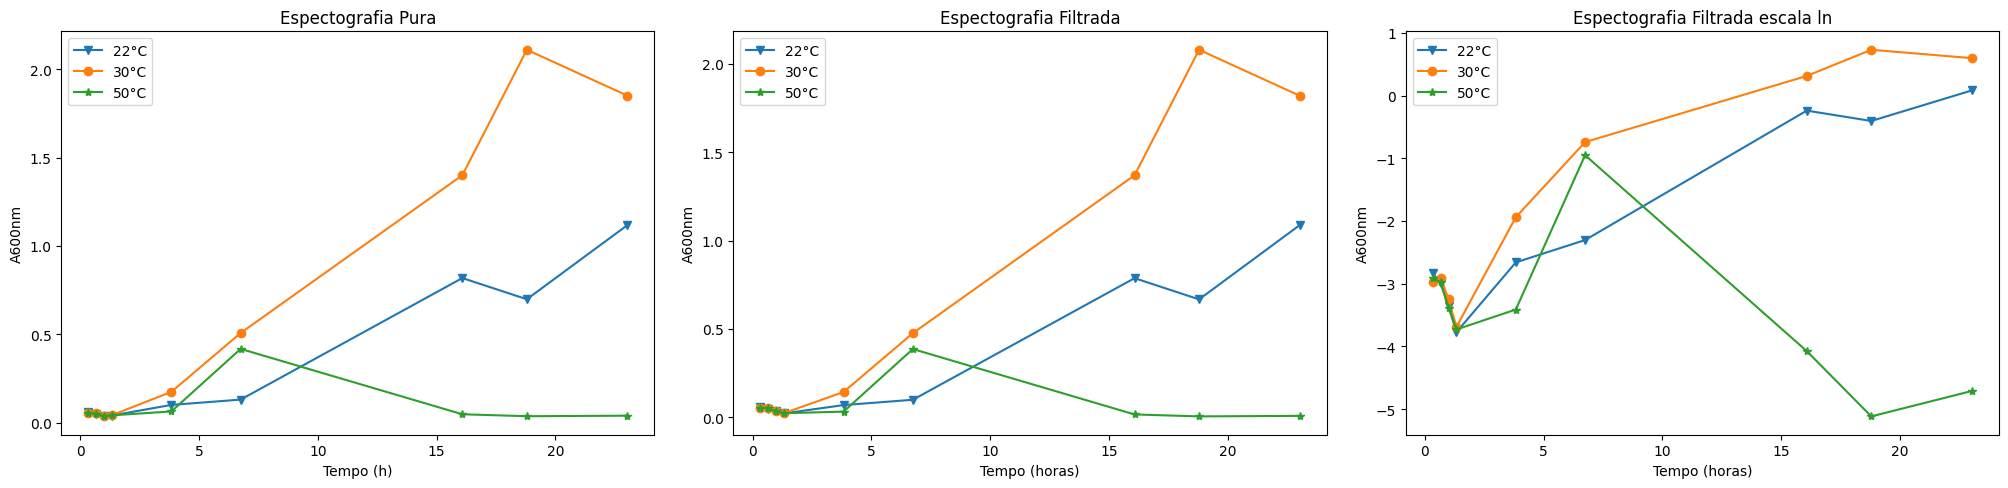

In [66]:

#Plota para 22
plt.figure().set_figwidth(20)
plt.subplot(1,3,1)
plt.plot(df["Tempo"],df["22°C"],marker="v",label ='22°C')
plt.plot(df["Tempo"],df["30"],marker="o",label ='30°C')
plt.plot(df["Tempo"],df["50"],marker="*",label ='50°C')
plt.title("Espectografia Pura")
plt.legend()
plt.ylabel("A600nm")
plt.xlabel("Tempo (h)")
#Plota para 22
plt.subplot(1,3,2)
plt.plot(df["Tempo"],df["22 Filtrado"],marker="v",label ='22°C')
plt.plot(df["Tempo"],df["30 Filtrado"],marker="o",label ='30°C')
plt.plot(df["Tempo"],df["50 Filtrado"],marker="*",label ='50°C')
plt.title("Espectografia Filtrada")
plt.legend()
plt.ylabel("A600nm")
plt.xlabel("Tempo (horas)")
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)


plt.subplot(1,3,3)
plt.plot(df["Tempo"],np.log(df["22 Filtrado"]),marker="v",label ='22°C')
plt.plot(df["Tempo"],np.log(df["30 Filtrado"]),marker="o",label ='30°C')
plt.plot(df["Tempo"],np.log(df["50 Filtrado"]),marker="*",label ='50°C')
plt.title("Espectografia Filtrada escala ln")
plt.legend()
plt.ylabel("A600nm")
plt.xlabel("Tempo (horas)")
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)

plt.savefig("imagens/espectrografias.png")

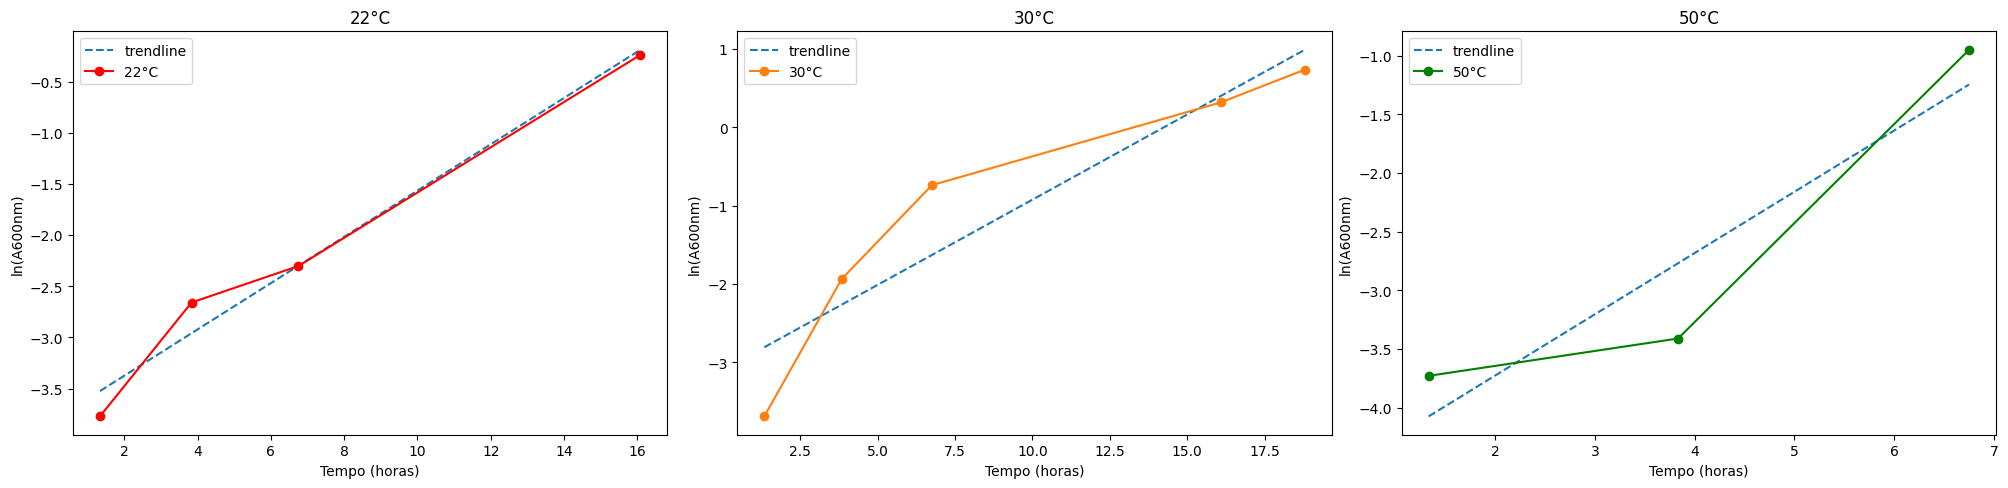

In [71]:
#Plota para 22 ln
from sklearn.linear_model import LinearRegression

trendlines = []
tempos = []
nomes = []
mis = []

# plt.figure(dpi=1000)
plt.figure().set_figwidth(20)
plt.subplot(1,3,1)
tempo = df["Tempo"][3:7]
tempos.append(tempo)
temperaturas = np.log(df["22 Filtrado"][3:7])
reg = np.polyfit(tempo,temperaturas,1)
funcao = np.poly1d(reg)
mis.append(reg[0])
plt.plot(tempo,funcao(tempo),"--",label="trendline")
trendlines.append(funcao(tempo))
plt.plot(tempo,temperaturas,'r',marker="o",label ='22°C')
plt.title("22°C")
nomes.append("22°C trendline, µ={}".format(round(reg[0],3)))
plt.legend()
plt.ylabel("ln(A600nm)")
plt.xlabel("Tempo (horas)")

#Plota para 30 ln
plt.subplot(1,3,2)
temperaturas = np.log(df["30 Filtrado"][3:8])
tempo = df["Tempo"][3:8]
tempos.append(tempo)
reg = np.polyfit(tempo,temperaturas,1)
mis.append(reg[0])
funcao = np.poly1d(reg)
plt.plot(tempo,funcao(tempo),"--",label="trendline")
trendlines.append(funcao(tempo))
plt.plot(tempo,temperaturas,marker="o",label ='30°C')
plt.title("30°C")
nomes.append("30°C trendline, µ={}".format(round(reg[0],3)))
plt.legend()
plt.ylabel("ln(A600nm)")
plt.xlabel("Tempo (horas)")

#plota para 50 ln
plt.subplot(1,3,3)
temperaturas = np.log(df["50 Filtrado"][3:6])
tempo = df["Tempo"][3:6]
tempos.append(tempo)
reg = np.polyfit(tempo,temperaturas,1)
funcao = np.poly1d(reg)
plt.plot(tempo,funcao(tempo),"--",label="trendline")
trendlines.append(funcao(tempo))
plt.plot(tempo,temperaturas,'g',marker="o",label ='50°C')
plt.title("50°C")
nomes.append("50°C trendline, µ={}".format(round(reg[0],3)))
plt.legend()
plt.ylabel("ln(A600nm)")
plt.xlabel("Tempo (horas)")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("imagens/espectrografias_escala_ln_trendlines.png")


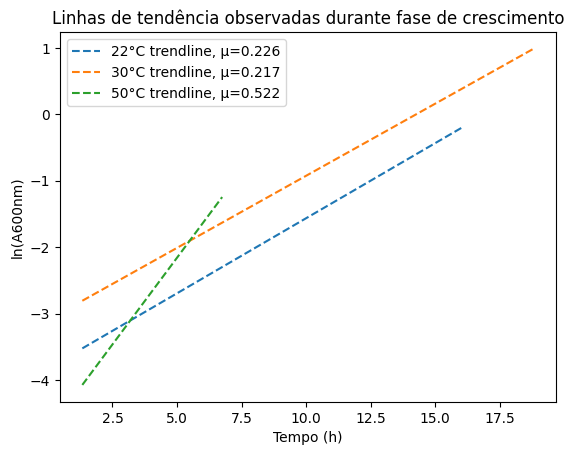

In [60]:
plt.figure(dpi=100)
plt.title("Linhas de tendência observadas durante fase de crescimento")
for trendline,tempo,nome in zip(trendlines,tempos,nomes):
    plt.plot(tempo,trendline,"--",label=nome)

plt.legend()
plt.xlabel("Tempo (h)")
plt.ylabel("ln(A600nm)")
plt.savefig("imagens/linhas_de_tendencia.png")